# Redes Neurais Artificiais aplicadas no reconhecimento de dígitos manuscritos

Inclusão dos pacotes.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.datasets import mnist

from sklearn.metrics import confusion_matrix, classification_report

1) Importe os dados da base de dados MNIST e faça as devidas manipulações para utilizar os dados com Redes Neurais.

In [3]:
# carrega o dataset mnist
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()

num_pixels = 28*28

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normaliza os dados
X_train = X_train / 255
X_test = X_test / 255

# coloca o vetor target em one-hot encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

2) Implemente o modelo.

In [38]:
model = Sequential()
model.add(Dense(256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


3) Treine o modelo.

In [39]:
history = model.fit(X_train, Y_train, validation_split=0.20, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2309 - accuracy: 0.9320 - val_loss: 0.1159 - val_accuracy: 0.9666
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0933 - accuracy: 0.9711 - val_loss: 0.1006 - val_accuracy: 0.9690
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0611 - accuracy: 0.9805 - val_loss: 0.1021 - val_accuracy: 0.9712
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0438 - accuracy: 0.9861 - val_loss: 0.0916 - val_accuracy: 0.9750
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0349 - accuracy: 0.9881 - val_loss: 0.0990 - val_accuracy: 0.9750
Epoch 6/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.1129 - val_accuracy: 0.9720
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 0.1083 - val_accu

4) Plote o gráfico da função de perda ao longo do processo de treinamento.

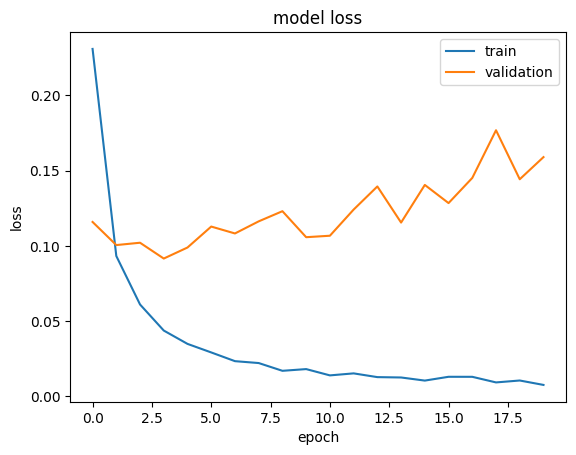

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

5) Imprima a acurácia do seu modelo quando aplicado à base de teste.

In [41]:
train_loss, train_acc = model.evaluate(X_train, Y_train, verbose=0)

print('Train acc:', train_acc)

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)

print('Test acc:', test_acc)

Train acc: 0.9924833178520203
Test acc: 0.9786999821662903


6) Imprima a matriz confusão do seu modelo quando aplicado à base de teste.

313/313 [==============================] - 1s 4ms/step


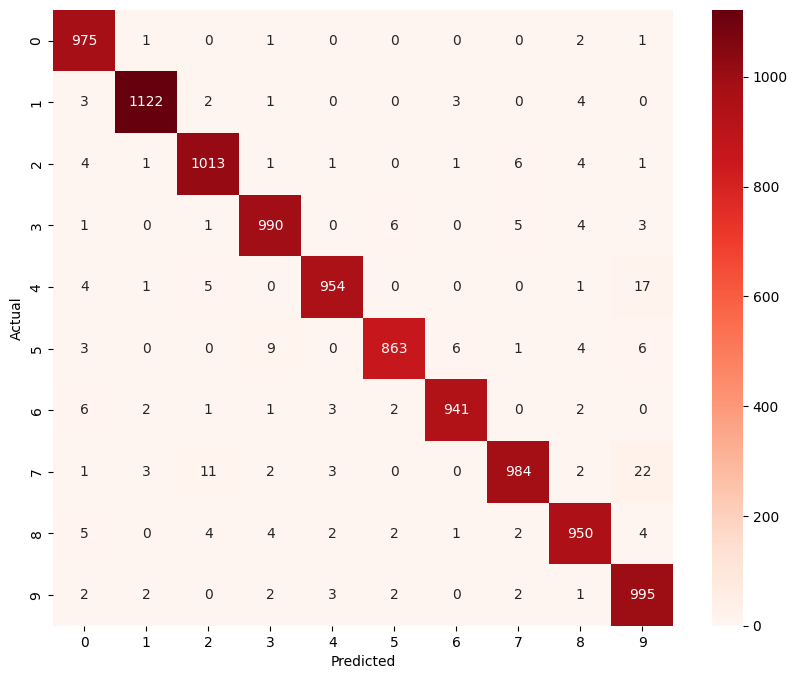

In [44]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test = np.argmax(Y_test, axis=1)
confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

7) Imprima as métricas de precision, recall e f1-score para cada um dos dígitos reconhecidos da base de teste.

In [48]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.95      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



---

<h1>Equipe</h1>

**Aluno 1**: Fabricio Bertoncello Filho (26648849)

**Aluno 2**: Lucas Guimarães Moreira (26681307)

**Aluno 3**: Bruno Dalagnol (25766201)

**Aluno 4**: Renato Leal de Araujo (26723573)
